## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

## **a. X^2**

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0
    r2 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - 2 * f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


### **1. Plot the function**

Text(0, 0.5, 'f(x)')

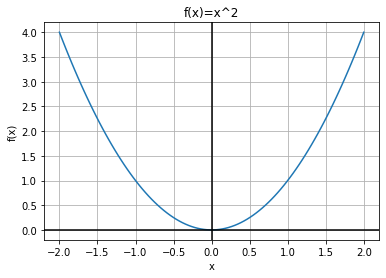

In [2]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')

### **2. Apply the Classic and Po Shen Loh ‘s methods**


**Classic**

x^2 = 0

a = 1   b = 0   c = 0 

\begin{equation}x = \frac{-0 \pm \sqrt{0^{2} - 4(1)(0)}}{2}\end{equation}

\begin{equation}x = 0 \end{equation}


**Po Shen Loh**

x^2 = 0

a = 1   b = 0   c = 0 

\begin{equation}\frac{{0^{2}}}{4} - u^{2} = 0\end{equation}
\begin{equation}u^{2} = 0\end{equation}
\begin{equation}u = 0\end{equation}

\begin{equation}r =\frac{0}{2} - 0 = 0\end{equation}

\begin{equation}s =\frac{0}{2} + 0 = 0\end{equation}

### **3. Plot the newton fractals**
### **Z^2**


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


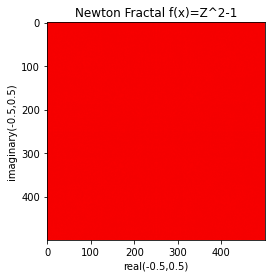

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


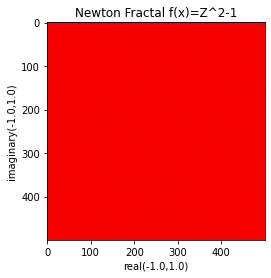

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


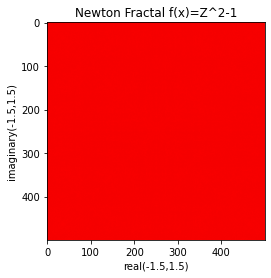

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


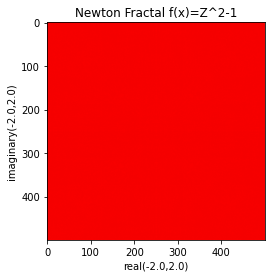

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


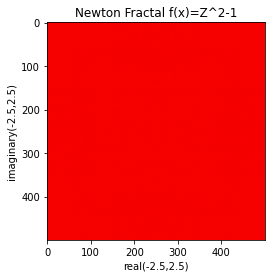

In [3]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


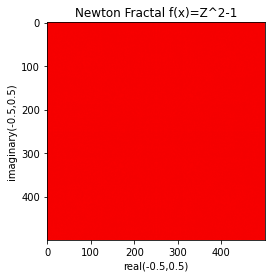

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


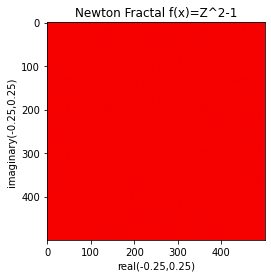

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


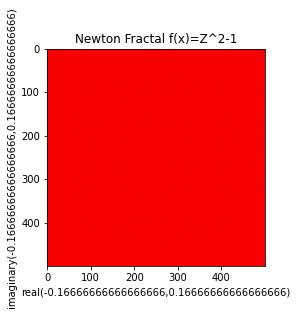

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


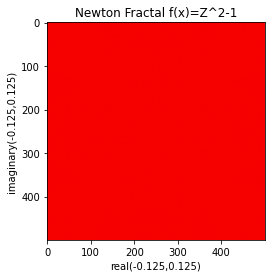

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


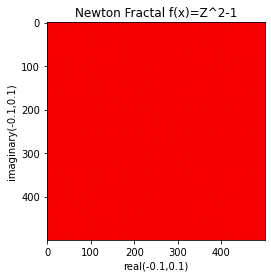

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


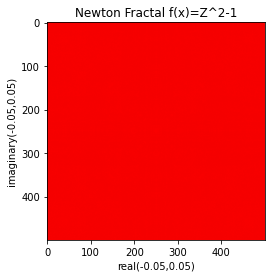

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


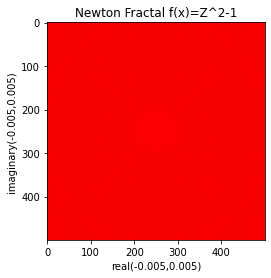

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


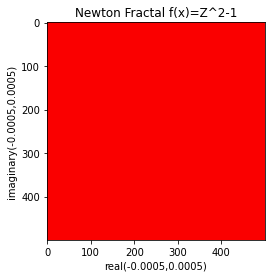

In [4]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

### **4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic** 

## Newton iterates form z=10.0 + 0.0j

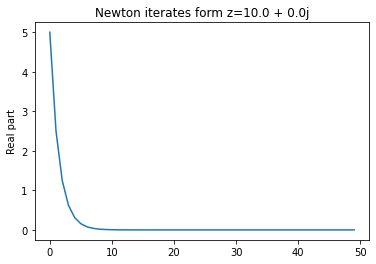

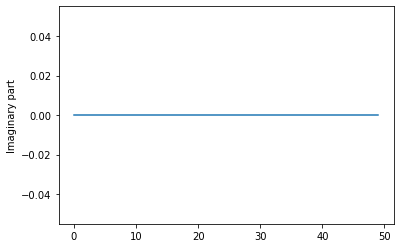

In [5]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=-10.0 + 0.0j

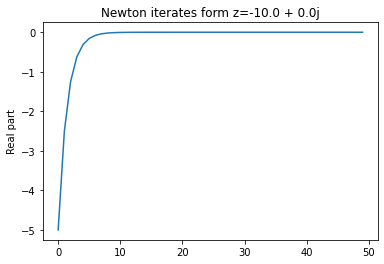

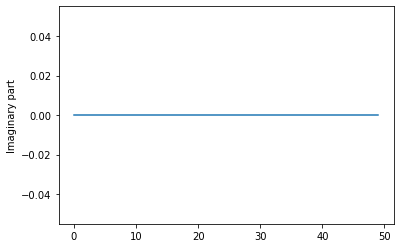

In [6]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 10.0j

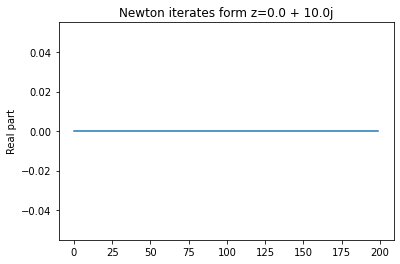

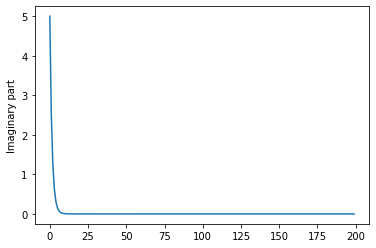

In [7]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 - 10.0j

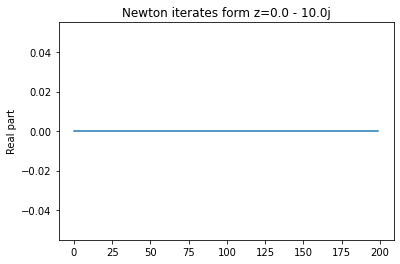

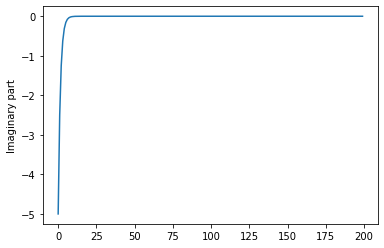

In [8]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

**Explicación x^2**

Se puede ver en las graficas anteriores que como la función solo posee una raiz, estas van a converger a cero sin importar su punto de partida, tanto en la parte real como imaginaria.



### **5. Plot he Newton iterates for points on the diagonals** 

## Newton iterates form z=10.0 + 10.0j

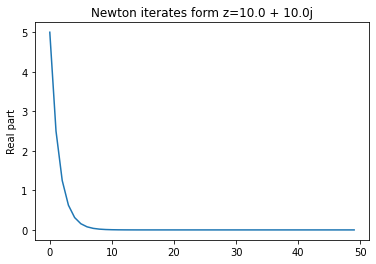

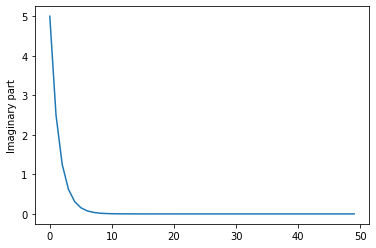

In [9]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=-10.0 + 10.0j

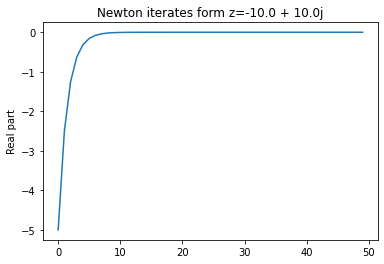

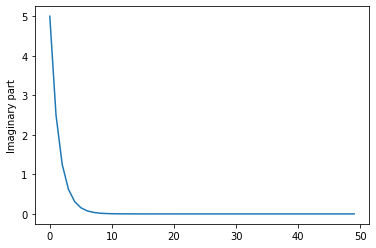

In [10]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=-10.0 - 10.0j

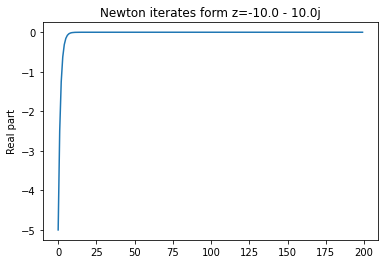

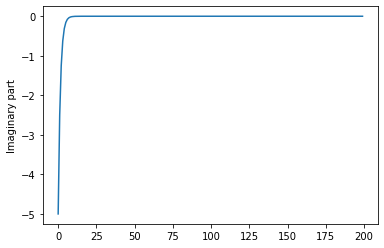

In [11]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=10.0 - 10.0j

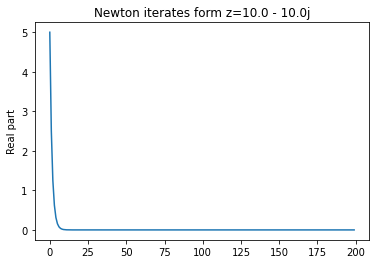

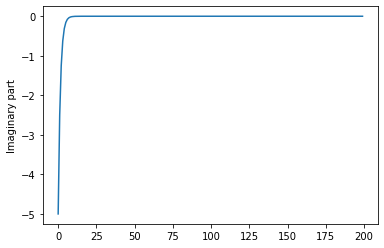

In [12]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 0.0j

In [13]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

**Explicación diagonales**

Como observamos en las graficas anteriores la función converge a 0 por cualquier diagonal, lo que nos puede llevar inclusive a pensar que no importa el punto en el que empecemos que igual newton raphson terminara llegando a la raiz en este caso.

## **b. (X-1)^2**

In [14]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return (z - 1) ** 2 

def df(z):
    return 2 * (z - 1)

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - 2 * f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


### **1. Plot the function**

Text(0, 0.5, 'f(x)')

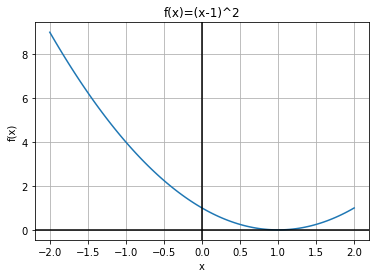

In [15]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('f(x)')

### **2. Apply the Classic and Po Shen Loh ‘s methods**


**Classic**

(x-1)^2 = 0

x^2-2x+1

a = 1   b = -2   c = 1

\begin{equation}x = \frac{2 \pm \sqrt{(-2)^{2} - 4(1)(1)}}{2}\end{equation}

\begin{equation}x = \frac {2}{2} \end{equation}

\begin{equation}x = 1 \end{equation}

**Po Shen Loh**

x^2 = 0

x^2-2x+1

a = 1   b = -2   c = 1

\begin{equation}\frac{{(-2)^{2}}}{4} - u^{2} = 1\end{equation}
\begin{equation}u^{2} = 0\end{equation}
\begin{equation}u = 0\end{equation}

\begin{equation}r =\frac{2}{2} - 0 = 1\end{equation}

\begin{equation}s =\frac{2}{2} + 0 = 1\end{equation}

### **3. Plot the newton fractals**
### **(Z-1)^2**


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


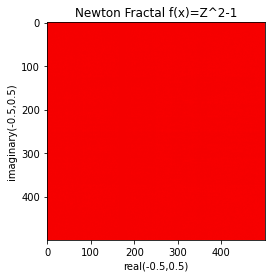

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


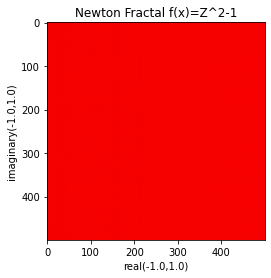

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


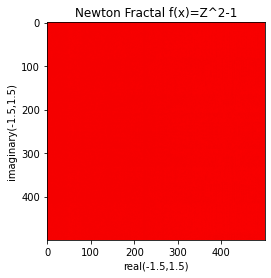

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


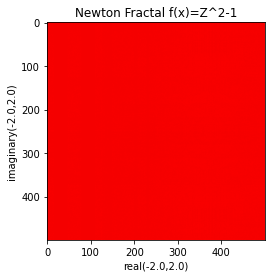

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


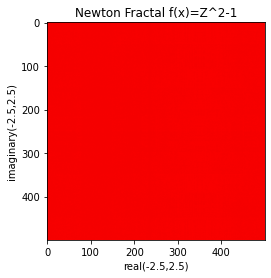

In [16]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


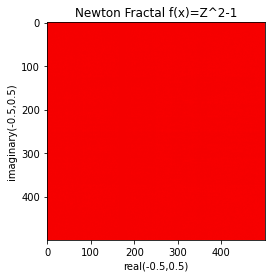

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


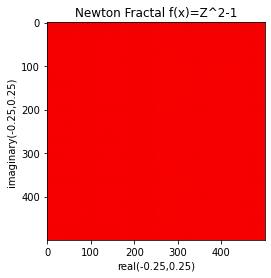

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


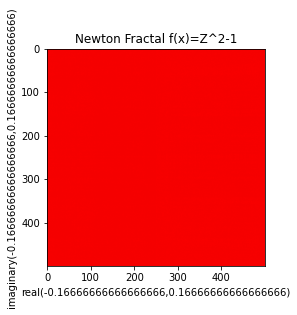

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


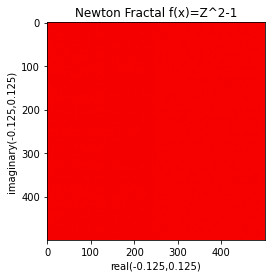

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


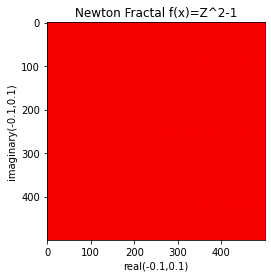

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


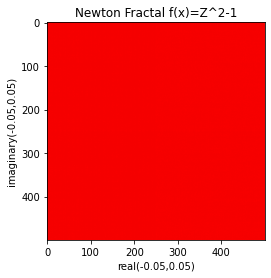

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


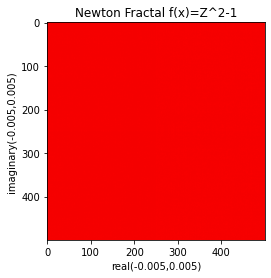

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


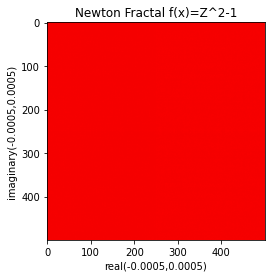

In [17]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

### **4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic** 

## Newton iterates form z=10.0 + 0.0j

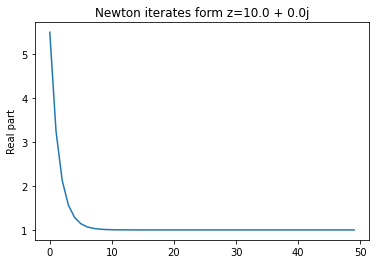

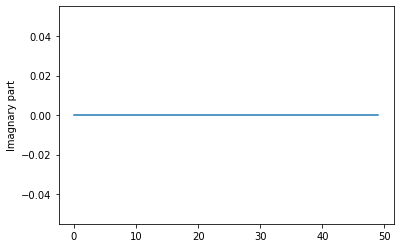

In [18]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 0.0j

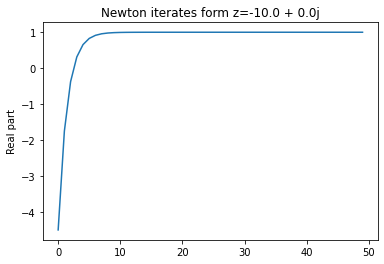

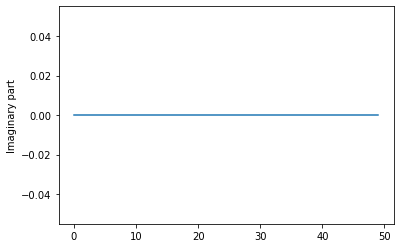

In [19]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 10.0j

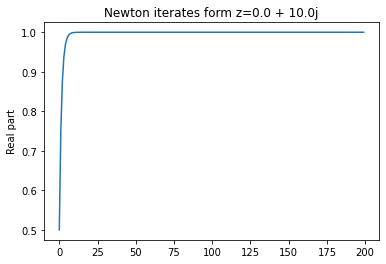

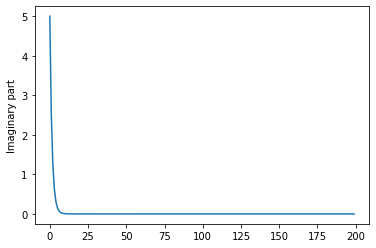

In [20]:
z=0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 - 10.0j

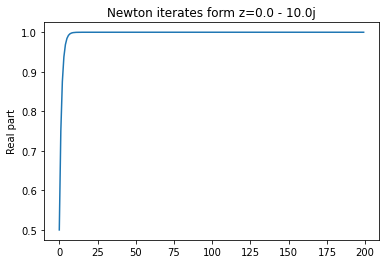

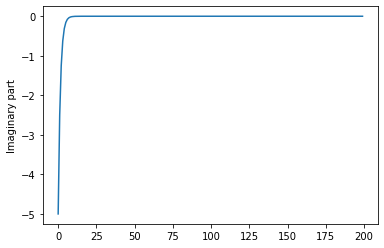

In [21]:
z=0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

**Explicación (X-1)^2**

En las graficas podemos ver que en la parte real tiende a 1 porque es su unica raiz real, mientras que en la parte imaginaria tiende a 0 porque no tiene reaices imaginarias

### **5. Plot he Newton iterates for points on the diagonals** 

## Newton iterates form z=10.0 + 10.0j

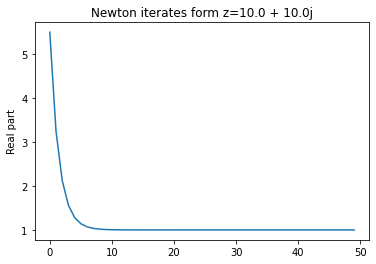

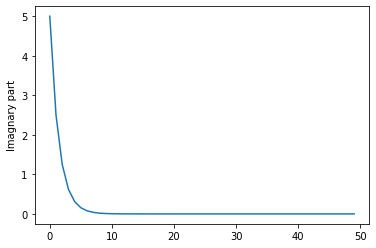

In [22]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 10.0j

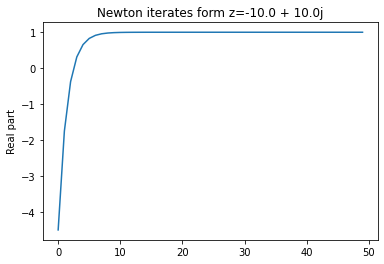

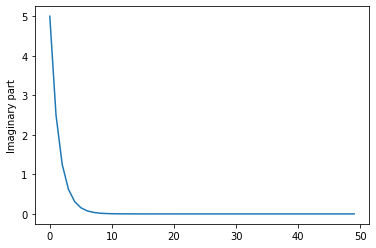

In [23]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=-10.0 - 10.0j

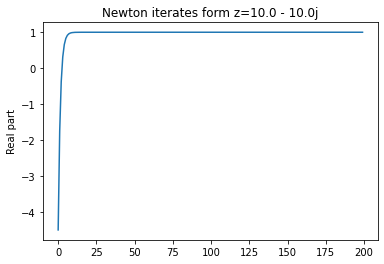

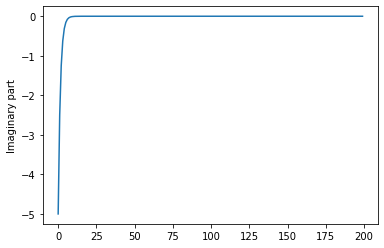

In [24]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=10.0 - 10.0j

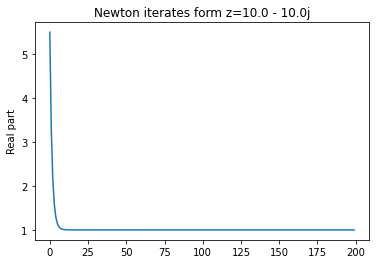

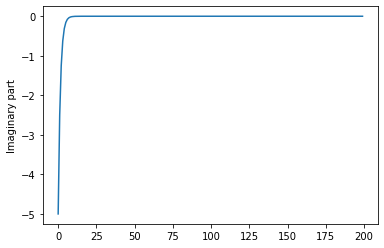

In [25]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Explicación diagonales

De las misma manera vemos aqui que desde las diagonales la grafica en la parte real va converge hacia su raiz real y en la parte imaginaria converge a 0 debido a que no tiene reices imaginarias.

## Newton iterates form z=0.0 + 0.0j

In [26]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

## **c. X^2 - 1**



In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

### **1. Plot the function**

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')

### **2. Apply the Classic and Po Shen Loh ‘s methods**


**Classic**

x^2 - 1 = 0

a = 1   b = 0   c = -1 

\begin{equation}x = \frac{-0 \pm \sqrt{0^{2} - 4(1)(-1)}}{2}\end{equation}

\begin{equation}x = \pm \frac{2}{2} \end{equation}

\begin{equation}x = \pm 1 \end{equation}

**Po Shen Loh**

x^2 - 1 = 0

a = 1   b = 0   c = -1

\begin{equation}\frac{{0^{2}}}{4} - u^{2} = -1\end{equation}
\begin{equation}u^{2} = 1\end{equation}
\begin{equation}u = \pm 1 \end{equation}

\begin{equation}r =\frac{0}{2} - 1 = -1\end{equation}

\begin{equation}s =\frac{0}{2} + 1 = 1\end{equation}

### **3. Plot the newton fractals**
### **Z^2 - 1**

In [ ]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

In [ ]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

### **4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic** 

## Newton iterates form z=10.0 + 0.0j

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 0.0j

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 10.0j

In [ ]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 - 10.0j

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

**Explicación**

En las graficas anteriores se observa que si empezamos en un eje positivo la grafica converge a 1, una de sus raices, mientras que si empezamos en el eje real negativo convergemos a -1 su otra raiz, con lo cual podemos obtener las dos racies reales de la funcion

En la parte compleja podemos ver que la parte real se queda quieta ya que esta en medio de las dos racies, por lo tanto el algoritmo de Newton no sabe a que raiz irse por lo tanto se queda iterando indefinidamente sin poder llegar a 0.



### **5. Plot he Newton iterates for points on the diagonals**

## Newton iterates form z=10.0 + 10.0j

In [ ]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 10.0j

In [ ]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=-10.0 - 10.0j

In [ ]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=10.0 - 10.0j

In [ ]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

**Explicación**

En las graficas podemos ver que desde los vertices si empezamos desde la parte real positiva llegamos a 1 y si empezamos desde la parte real negativa llegamos a -1, osea obtenemos tambien las 2 raices reales de la funcion. Sin embargo aqui podemos ver que la parte imaginaria no oscila desde este punto sino que de una vez converge a 0.



## Newton iterates form z=0.0 + 0.0j

In [ ]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## **d. X^2 + 1**

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = complex(0.0, 1.0)
    r2 = complex(0.0, -1.0)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

### **1. Plot the function**

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2+1')
plt.xlabel('x')
plt.ylabel('f(x)')

### **2. Apply the Classic and Po Shen Loh ‘s methods**


**Classic**

x^2 + 1 = 0

a = 1   b = 0   c = 1 

\begin{equation}x = \frac{-0 \pm \sqrt{0^{2} - 4(1)(1)}}{2}\end{equation}

\begin{equation}x = \pm \frac{2 \sqrt{-1}}{2} \end{equation}

\begin{equation}x = \pm i \end{equation}

**Po Shen Loh**

x^2 + 1 = 0

a = 1   b = 0   c = 1

\begin{equation}\frac{{0^{2}}}{4} - u^{2} = 1\end{equation}
\begin{equation}u^{2} = -1\end{equation}
\begin{equation}u = \pm i \end{equation}

\begin{equation}r =\frac{0}{2} - i = -i\end{equation}

\begin{equation}s =\frac{0}{2} + i = i\end{equation}

### **3. Plot the newton fractals**
### **Z^2 + 1**

In [ ]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

In [ ]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

### **4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic** 

## Newton iterates form z=10.0 + 0.0j

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 0.0j

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 10.0j

In [ ]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 - 10.0j

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

**Explicación z^2+1**

En las graficas se puede ver que si empezamos en los ejes de la parte imaginaria positiva tendemos a 1 y si lo hacemos desde la parte negativa tenedemos a -1, lo que nos da como resultado las dos raices complejas de la funcion i, -i

En los ejes de la grafica real, la parte compleja se queda quieta debido a que esta en la mitad de las dos raices, por lo tanto no sabe a cual raiz irse por lo tanto en la parte real el algortimo empieza a iterar sin llegar a converger a 0

### **5. Plot he Newton iterates for points on the diagonals**

## Newton iterates form z=10.0 + 10.0j

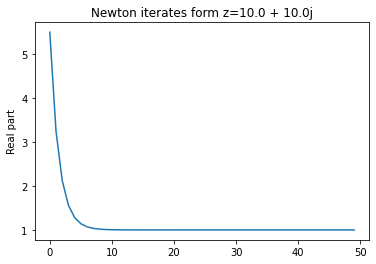

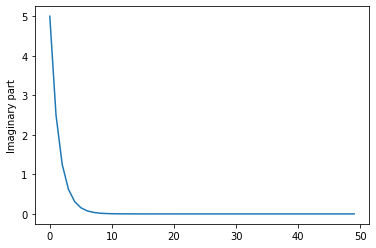

In [27]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=-10.0 + 10.0j

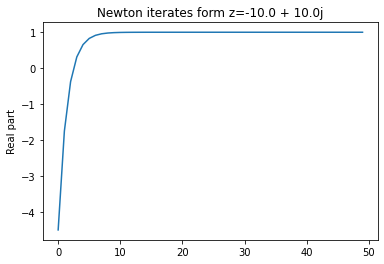

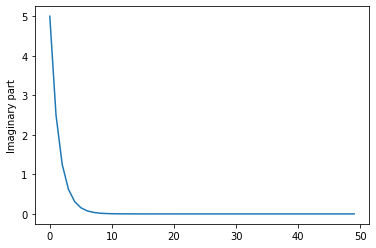

In [28]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=-10.0 - 10.0j

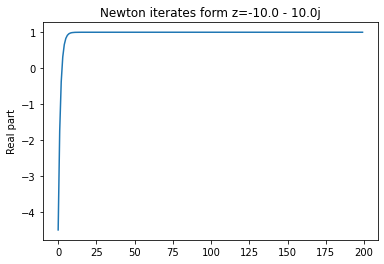

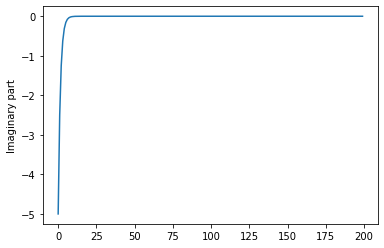

In [29]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=10.0 - 10.0j

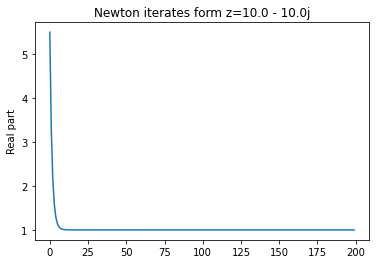

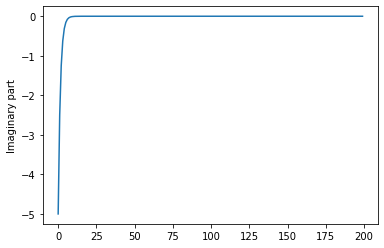

In [30]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

**Explicación**

Al igual que arriba si empezamos en la parte compleja positiva este covergera a 1, mientras que si empezamos en la parte compleja negativa convergera a -1. Por otro lado en la parte real aqui si tendemos de una vez a cero ya que no tiene reaices reales.

## Newton iterates form z=0.0 + 0.0j

In [31]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored